In [1]:
! pip install numpy 
! pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from  statsmodels.tsa.arima.model import ARIMA

In [13]:
df = pd.read_csv(r"F:\computational statistic\computational-statistic-for-sem3\dataset\train.csv")
df.info

<bound method DataFrame.info of         Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0        1          60       RL         65.0     8450   Pave   NaN      Reg   
1        2          20       RL         80.0     9600   Pave   NaN      Reg   
2        3          60       RL         68.0    11250   Pave   NaN      IR1   
3        4          70       RL         60.0     9550   Pave   NaN      IR1   
4        5          60       RL         84.0    14260   Pave   NaN      IR1   
...    ...         ...      ...          ...      ...    ...   ...      ...   
1455  1456          60       RL         62.0     7917   Pave   NaN      Reg   
1456  1457          20       RL         85.0    13175   Pave   NaN      Reg   
1457  1458          70       RL         66.0     9042   Pave   NaN      Reg   
1458  1459          20       RL         68.0     9717   Pave   NaN      Reg   
1459  1460          20       RL         75.0     9937   Pave   NaN      Reg   

     LandContour Ut

In [28]:
df['Date'] = pd.to_datetime(df['YrSold'].astype(str) + '-' + df['MoSold'].astype(str) + '-01')


In [29]:
monthly_sales = df.groupby('Date')['SalePrice'].sum().reset_index()
monthly_sales.set_index('Date', inplace=True)

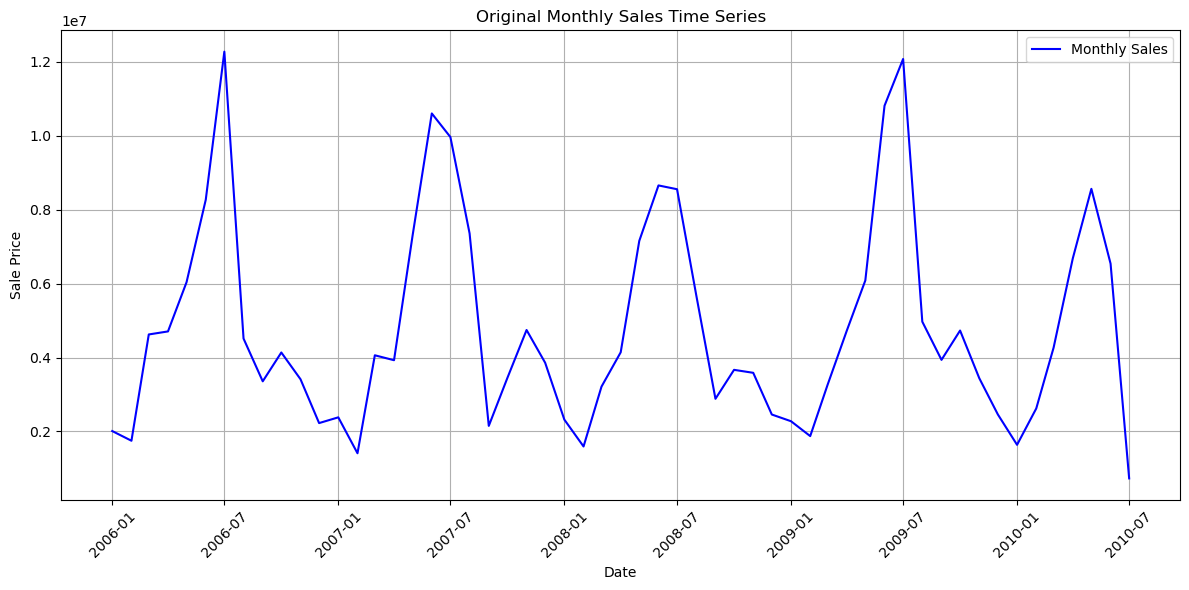

In [30]:
# Plotting the original time series of SalePrice
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index, monthly_sales['SalePrice'], label='Monthly Sales', color='blue')

plt.title('Original Monthly Sales Time Series')
plt.xlabel('Date')
plt.ylabel('Sale Price')
plt.xticks(rotation=45)
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

In [36]:
# Fit the ARIMA model (adjust order as needed)
model = ARIMA(monthly_sales['SalePrice'], order=(1, 1, 1))
fitted_model = model.fit()

c:\Users\Tamil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Tamil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Tamil\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [37]:
# Forecast the next 12 months
forecast = fitted_model.get_forecast(steps=12)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Create a DataFrame for forecasted values
forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(1), periods=12, freq='M')
forecast_mean.index = forecast_index
forecast_ci.index = forecast_index

C:\Users\Tamil\AppData\Local\Temp\ipykernel_13400\2148657474.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales.index[-1] + pd.DateOffset(1), periods=12, freq='M')


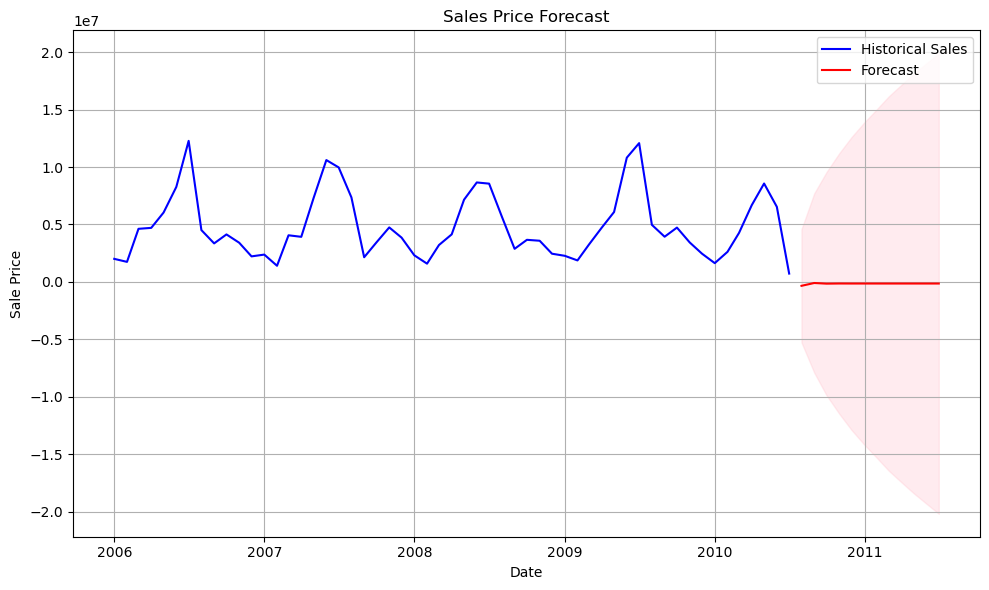

In [39]:
plt.figure(figsize=(10, 6))

# Plot historical sales data
plt.plot(monthly_sales.index, monthly_sales['SalePrice'], label="Historical Sales", color="blue")

# Plot forecasted sales mean
plt.plot(forecast_mean.index, forecast_mean, label="Forecast", color="red")

# Plot confidence intervals
plt.fill_between(
    forecast_ci.index,
    forecast_ci.iloc[:, 0],
    forecast_ci.iloc[:, 1],
    color="pink",
    alpha=0.3,
)

plt.title("Sales Price Forecast")
plt.xlabel("Date")
plt.ylabel("Sale Price")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()